<a href="https://colab.research.google.com/github/Rose-Hansen/EVST-Thesis/blob/main/FINAL_EVST_Thesis_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# basics
import pandas as pd
import numpy as np


# geo
import geopandas as gpd


# plotting
from plotnine import *
import plotnine


#seaborn


import seaborn as sns


import statsmodels.api as sm


#spicy stats for t test / hypothesis
import scipy.stats as stats

The following is my code for analyzing the data that I used as well as the data for creating my main results. The data is drawn from the Kikstra paper cited in my thesis. Everything in this code book can be found in the Appendix of this thesis.

In [43]:
# Start by reading in the necessary data!

df_DLE = pd.read_csv('/content/drive/MyDrive/EVST Thesis/EVST Thesis Data/SSP2_2040_lctFALSE_country (1) (1).csv')

df_DLE.head()

,region,year,dimension,grp,type,elec,DLE,unit.DLE,DLE.pcap,unit.DLE.pcap,geo.res
0,ABW,2015,transport,car,OP,elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
1,ABW,2015,transport,car,OP,non.elec,0.000412,EJ/year,3.491364,GJ/cap/year,Country
2,ABW,2015,transport,car,OP,total,0.000412,EJ/year,3.491364,GJ/cap/year,Country
3,ABW,2020,transport,car,OP,elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
4,ABW,2020,transport,car,OP,non.elec,0.000531,EJ/year,4.239020,GJ/cap/year,Country


In [44]:
# Let's clean up this data and get only the things that we want!

# I will filter the results just for India and because I am only interested the total EJ per year, I will remove the columns that I don't need at the moment.

df_DLE = df_DLE[df_DLE['region'] == 'IND']
df_DLE

,region,year,dimension,grp,type,elec,DLE,unit.DLE,DLE.pcap,unit.DLE.pcap,geo.res
85320,IND,2015,transport,car,OP,elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
85321,IND,2015,transport,car,OP,non.elec,1.130635,EJ/year,0.864444,GJ/cap/year,Country
85322,IND,2015,transport,car,OP,total,1.130635,EJ/year,0.864444,GJ/cap/year,Country
85323,IND,2020,transport,car,OP,elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
85324,IND,2020,transport,car,OP,non.elec,1.439849,EJ/year,1.037288,GJ/cap/year,Country
...,...,...,...,...,...,...,...,...,...,...,...
1450165,IND,2095,hotwater_op,urban,CON.new.dls,non.elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
1450166,IND,2095,hotwater_op,urban,CON.new.dls,total,0.000000,EJ/year,0.000000,GJ/cap/year,Country
1450167,IND,2100,hotwater_op,urban,CON.new.dls,elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country
1450168,IND,2100,hotwater_op,urban,CON.new.dls,non.elec,0.000000,EJ/year,0.000000,GJ/cap/year,Country


In [45]:
# Let's chech this dataset to understand it's shape and to check for duplicates and missing data

print(df_DLE.shape)

print(df_DLE.duplicated().sum())

print(df_DLE.isnull().sum())

(7830, 11)
0
region           0
year             0
dimension        0
grp              0
type             0
elec             0
DLE              0
unit.DLE         0
DLE.pcap         0
unit.DLE.pcap    0
geo.res          0
dtype: int64


In [46]:
# What kind of data are inside each of the columns? Let's check!

print(df_DLE.dtypes)

region            object
year               int64
dimension         object
grp               object
type              object
elec              object
DLE              float64
unit.DLE          object
DLE.pcap         float64
unit.DLE.pcap     object
geo.res           object
dtype: object


In [47]:
# Now that we know that the data looks clean, let's proceed with removing the unnecessary columns for our purposes. We will remove the unit.DLE.pcap column, DLE.pcap, geo.res, and region, because we know that it is always IND

df_DLE = df_DLE.drop(columns=['unit.DLE.pcap','DLE.pcap','geo.res','region'])

df_DLE.head()

,year,dimension,grp,type,elec,DLE,unit.DLE
85320,2015,transport,car,OP,elec,0.000000,EJ/year
85321,2015,transport,car,OP,non.elec,1.130635,EJ/year
85322,2015,transport,car,OP,total,1.130635,EJ/year
85323,2020,transport,car,OP,elec,0.000000,EJ/year
85324,2020,transport,car,OP,non.elec,1.439849,EJ/year


In [48]:

# However, I will only be looking at data between this year (2025) and 2040. Let's clean for those years!

df_DLE_RH = df_DLE[df_DLE['year'].isin([2025, 2030, 2035, 2040])]

df_DLE_RH

,year,dimension,grp,type,elec,DLE,unit.DLE
85326,2025,transport,car,OP,elec,0.000000,EJ/year
85327,2025,transport,car,OP,non.elec,1.768936,EJ/year
85328,2025,transport,car,OP,total,1.768936,EJ/year
85329,2030,transport,car,OP,elec,0.000000,EJ/year
85330,2030,transport,car,OP,non.elec,2.114010,EJ/year
...,...,...,...,...,...,...,...
1450129,2035,hotwater_op,urban,CON.new.dls,non.elec,0.000000,EJ/year
1450130,2035,hotwater_op,urban,CON.new.dls,total,0.000000,EJ/year
1450131,2040,hotwater_op,urban,CON.new.dls,elec,0.000000,EJ/year
1450132,2040,hotwater_op,urban,CON.new.dls,non.elec,0.000000,EJ/year


In [49]:
# Let's double check it worked by finding the number of unique values in the year column

df_DLE_RH['year'].unique()


array([2025, 2030, 2035, 2040])

In [50]:

# Because we are interested in the Operations and Construction of electric options and nonelectric options seperately, let's get rid of the 'elec' columns that have the 'total' value

df_DLE_RH = df_DLE_RH[df_DLE_RH['elec'] != 'total']

# Now, let's drop out all of the CON.new.dls value from the 'type' column, because the value is always zero and it is actaully unneccessary for this analysis!

df_DLE_RH = df_DLE_RH[df_DLE_RH['type'] != 'CON.new.dls']


In [51]:
# Now let's pivot the data so that every type is its own column

df_DLE_RH = df_DLE_RH.pivot(index=['year','dimension','grp','elec','unit.DLE'], columns='type', values='DLE').reset_index()


df_DLE_RH


type,year,dimension,grp,elec,unit.DLE,CON.new,CON.new.pop,CON.rep,OP
0,2025,appliances,clean_cooking_fuel,elec,EJ/year,0.000248,0.000063,0.000437,0.000000
1,2025,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000164,0.000042,0.000289,0.491331
2,2025,appliances,mobile_telephone,elec,EJ/year,0.000202,0.000130,0.002446,0.008185
3,2025,appliances,mobile_telephone,non.elec,EJ/year,0.000305,0.000197,0.003697,0.000000
4,2025,appliances,refrigerator,elec,EJ/year,0.017964,0.002973,0.009668,0.104538
...,...,...,...,...,...,...,...,...,...
227,2040,transport,rail,non.elec,EJ/year,0.000227,0.000227,0.000431,0.000000
228,2040,transport,twothree,elec,EJ/year,0.003200,0.003200,0.024339,0.000000
229,2040,transport,twothree,non.elec,EJ/year,0.012025,0.012025,0.091456,2.134531
230,2040,water,water,elec,EJ/year,0.000007,0.000007,0.000012,0.070770


In [52]:
# Add three columns together and store the result in a new column


df_DLE_RH['CON_TOTAL'] = df_DLE_RH['CON.new'] + df_DLE_RH['CON.new.pop'] + df_DLE_RH['CON.rep']

df_DLE_RH


type,year,dimension,grp,elec,unit.DLE,CON.new,CON.new.pop,CON.rep,OP,CON_TOTAL
0,2025,appliances,clean_cooking_fuel,elec,EJ/year,0.000248,0.000063,0.000437,0.000000,0.000748
1,2025,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000164,0.000042,0.000289,0.491331,0.000495
2,2025,appliances,mobile_telephone,elec,EJ/year,0.000202,0.000130,0.002446,0.008185,0.002778
3,2025,appliances,mobile_telephone,non.elec,EJ/year,0.000305,0.000197,0.003697,0.000000,0.004199
4,2025,appliances,refrigerator,elec,EJ/year,0.017964,0.002973,0.009668,0.104538,0.030605
...,...,...,...,...,...,...,...,...,...,...
227,2040,transport,rail,non.elec,EJ/year,0.000227,0.000227,0.000431,0.000000,0.000885
228,2040,transport,twothree,elec,EJ/year,0.003200,0.003200,0.024339,0.000000,0.030740
229,2040,transport,twothree,non.elec,EJ/year,0.012025,0.012025,0.091456,2.134531,0.115507
230,2040,water,water,elec,EJ/year,0.000007,0.000007,0.000012,0.070770,0.000026


In [53]:
# For each of the DLE OP values, there doesn't appear to be any values for the clean cooking elec OP
# This would be the energy required to operate the electric stoves

df_DLE_RH[(df_DLE_RH['grp']=='clean_cooking_fuel') & (df_DLE_RH['elec']== 'elec')]

type,year,dimension,grp,elec,unit.DLE,CON.new,CON.new.pop,CON.rep,OP,CON_TOTAL
0,2025,appliances,clean_cooking_fuel,elec,EJ/year,0.000248,0.000063,0.000437,0.0,0.000748
58,2030,appliances,clean_cooking_fuel,elec,EJ/year,0.000259,0.000065,0.000457,0.0,0.000782
116,2035,appliances,clean_cooking_fuel,elec,EJ/year,0.000270,0.000068,0.000476,0.0,0.000814
174,2040,appliances,clean_cooking_fuel,elec,EJ/year,0.000068,0.000068,0.000492,0.0,0.000629


In [54]:
# Here are the data that we would need to use to calculate the elec requirements for stoves under the RE 2040 scenario

df_DLE_RH[(df_DLE_RH['grp']=='clean_cooking_fuel') & (df_DLE_RH['elec']== 'non.elec')]

type,year,dimension,grp,elec,unit.DLE,CON.new,CON.new.pop,CON.rep,OP,CON_TOTAL
1,2025,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000164,0.000042,0.000289,0.491331,0.000495
59,2030,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000172,0.000043,0.000303,0.590269,0.000518
117,2035,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000179,0.000045,0.000315,0.693722,0.000539
175,2040,appliances,clean_cooking_fuel,non.elec,EJ/year,0.000045,0.000045,0.000326,0.800253,0.000416


In [55]:
# Let's drop the columns that we don't need anymore, since we are considering the total CON value: df_DLE_2040['CON.new'] + df_DLE_2040['CON.new.pop'] + df_DLE_2040['CON.rep']

df_DLE_RH = df_DLE_RH.drop(columns=['CON.new', 'CON.new.pop', 'CON.rep'])

df_DLE_RH

type,year,dimension,grp,elec,unit.DLE,OP,CON_TOTAL
0,2025,appliances,clean_cooking_fuel,elec,EJ/year,0.000000,0.000748
1,2025,appliances,clean_cooking_fuel,non.elec,EJ/year,0.491331,0.000495
2,2025,appliances,mobile_telephone,elec,EJ/year,0.008185,0.002778
3,2025,appliances,mobile_telephone,non.elec,EJ/year,0.000000,0.004199
4,2025,appliances,refrigerator,elec,EJ/year,0.104538,0.030605
...,...,...,...,...,...,...,...
227,2040,transport,rail,non.elec,EJ/year,0.000000,0.000885
228,2040,transport,twothree,elec,EJ/year,0.000000,0.030740
229,2040,transport,twothree,non.elec,EJ/year,2.134531,0.115507
230,2040,water,water,elec,EJ/year,0.070770,0.000026


In [56]:
# Let's filter the data where the dimension column equals cooling_con or cooling_op

df_DLE_RH[(df_DLE_RH['dimension'] == 'cooling_op') | (df_DLE_RH['dimension'] == 'cooling_con')]

type,year,dimension,grp,elec,unit.DLE,OP,CON_TOTAL
12,2025,cooling_con,rural,elec,EJ/year,0.000000,0.004348
13,2025,cooling_con,rural,non.elec,EJ/year,0.000000,0.005783
14,2025,cooling_con,urban,elec,EJ/year,0.000000,0.003998
15,2025,cooling_con,urban,non.elec,EJ/year,0.000000,0.005317
16,2025,cooling_op,rural,elec,EJ/year,0.096759,0.000000
17,2025,cooling_op,rural,non.elec,EJ/year,0.000000,0.000000
18,2025,cooling_op,urban,elec,EJ/year,0.065026,0.000000
19,2025,cooling_op,urban,non.elec,EJ/year,0.000000,0.000000
70,2030,cooling_con,rural,elec,EJ/year,0.000000,0.004243
71,2030,cooling_con,rural,non.elec,EJ/year,0.000000,0.005643


In [57]:
# Now, it's time to condense the columns that have cooling_con and cooling_op seperated are together

# Fix the 2025 cooling columns

df_DLE_RH.at[12,'OP'] = 0.096759

df_DLE_RH.at[14,'OP'] = 0.065026


In [58]:
# Fix the 2030 columns

df_DLE_RH.at[70,'OP'] = 0.138826

df_DLE_RH.at[72,'OP'] = 0.105404

# Fix the 2035 columns

df_DLE_RH.at[130,'OP'] = 0.153251

df_DLE_RH.at[128,'OP'] = 0.179236

# Fix the 2040 columns

df_DLE_RH.at[186,'OP'] = 0.217103

df_DLE_RH.at[188,'OP'] = 0.208376

In [59]:
# Let's rename certain cells based on their type and dimension

df_DLE_RH.at[(12, 13, 14, 15, 70, 71, 72, 73, 128, 129, 130, 131, 186, 187, 188, 189)
,'dimension'] = 'cooling'

In [60]:
# Let's drop the rows that have cooling_op in the dimension column

df_DLE_RH = df_DLE_RH[df_DLE_RH['dimension'] != 'cooling_op'] # Use parentheses to call the drop method and pass the condition

In [61]:
# Time to do it all again for the heating component

df_DLE_RH[(df_DLE_RH['dimension'] == 'heating_op') | (df_DLE_RH['dimension'] == 'heating_con')]

type,year,dimension,grp,elec,unit.DLE,OP,CON_TOTAL
26,2025,heating_con,rural,elec,EJ/year,0.000000,0.000879
27,2025,heating_con,rural,non.elec,EJ/year,0.000000,0.001169
28,2025,heating_con,urban,elec,EJ/year,0.000000,0.000857
29,2025,heating_con,urban,non.elec,EJ/year,0.000000,0.001140
30,2025,heating_op,rural,elec,EJ/year,0.131496,0.000000
31,2025,heating_op,rural,non.elec,EJ/year,0.000000,0.000000
32,2025,heating_op,urban,elec,EJ/year,0.061783,0.000000
33,2025,heating_op,urban,non.elec,EJ/year,0.000000,0.000000
84,2030,heating_con,rural,elec,EJ/year,0.000000,0.000854
85,2030,heating_con,rural,non.elec,EJ/year,0.000000,0.001136


In [62]:
# Fix the cells to combine heating_op with heating_con

# Fix the 2025 columns

df_DLE_RH.at[26,'OP'] = 0.131496

df_DLE_RH.at[28,'OP'] = 0.061783

# Fix the 2030 columns

df_DLE_RH.at[84,'OP'] = 0.180204

df_DLE_RH.at[86,'OP'] = 0.095654


# Fix the 2035 columns

df_DLE_RH.at[142,'OP'] = 0.226852

df_DLE_RH.at[144,'OP'] = 0.135604

# Fix the 2040 columns

df_DLE_RH.at[200,'OP'] = 0.270414

df_DLE_RH.at[202,'OP'] = 0.181454

In [63]:
# Let's rename certain cells based on their type and dimension

df_DLE_RH.at[(26, 27, 28, 29, 84, 85, 86, 87, 142, 143, 144, 145, 200, 201, 202, 203)
,'dimension'] = 'heating'


In [64]:
# Let's drop the rows that have heating_op in the dimension column

df_DLE_RH = df_DLE_RH[df_DLE_RH['dimension'] != 'heating_op']

In [65]:
# Let's get one value for the EJ needed to reach DLS

df_DLE_RH['DLE Energy TOTAL'] = df_DLE_RH['CON_TOTAL']+df_DLE_RH['OP']


In [66]:
# Pivot the data so that elec and non.elec are colunns

df_spreadsheet= df_DLE_RH.pivot(index=['year','dimension','grp','unit.DLE'], columns='elec', values= ['OP','CON_TOTAL']).reset_index()

df_spreadsheet

year   dimension                 grp unit.DLE        OP            \
elec                                                     elec  non.elec   
0     2025  appliances  clean_cooking_fuel  EJ/year  0.000000  0.491331   
1     2025  appliances    mobile_telephone  EJ/year  0.008185  0.000000   
2     2025  appliances        refrigerator  EJ/year  0.104538  0.000000   
3     2025  appliances          television  EJ/year  0.180556  0.000000   
4     2025    clothing            clothing  EJ/year  0.271548  0.503283   
..     ...         ...                 ...      ...       ...       ...   
95    2040   transport                 bus  EJ/year  0.000000  1.329912   
96    2040   transport                 car  EJ/year  0.000000  2.759755   
97    2040   transport                rail  EJ/year  0.099813  0.000000   
98    2040   transport            twothree  EJ/year  0.000000  2.134531   
99    2040       water               water  EJ/year  0.070770  0.021343   

     CON_TOTAL            
elec      elec  non.elec  
0     0.000748  0.000495  
1     0.002778  0.004199  
2     0.030605  0.040699  
3     0.011842  0.017899  
4     0.000000  0.000000  
..         ...       ...  
95    0.001242  0.005014  
96    0.228470  0.641112  
97    0.000955  0.000885  
98    0.030740  0.115507  
99    0.000026  0.000211  

[100 rows x 8 columns]

After reaching this point in my analysis, I migrated these data into Excel and manipulated them from there. My calculations and further manipulations can be found in the appendix.

The rest of this codebook consists of the code used to develop each of the graphs included in my thesis, labeled by letter and title.

In [67]:
import matplotlib.pyplot as plt

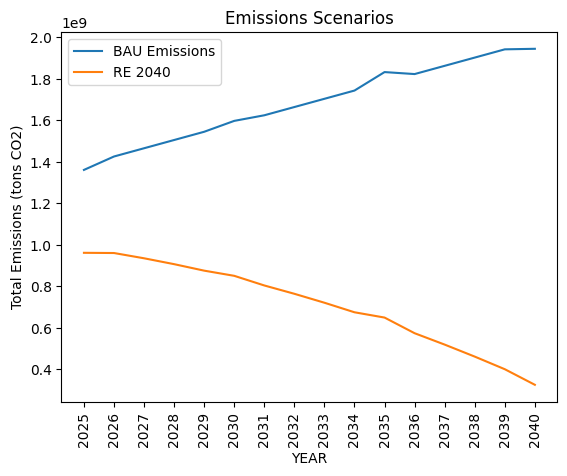

In [68]:
# FIGURE A -- Emissions Scenarios

x = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
y_BAU = [1361080805,1425785847,1465541641,1505297434,1545053228,1597561476,1624564815,1664320609,1704076403,1743832196,1832930829,1823343784,1863099577,1902855371,1942611165,1945220914]
y_re2040 = [961222313,960223571,934832792,906489074,875192418,850231713,803740290,763584819,720476409,674415060,648932988,573433548,518513385,460640282,399814242,324653258]

# Create the plot
plt.plot(x, y_BAU, label='BAU Emissions')
plt.plot(x, y_re2040, label='RE 2040')

# Add labels and title
plt.xlabel('YEAR')
plt.ylabel('Total Emissions (tons CO2)')
plt.title('Emissions Scenarios')

# Add a legend
plt.legend()


# Make an x axis longer
plt.xticks(rotation=90)

# Show the plot
plt.show()

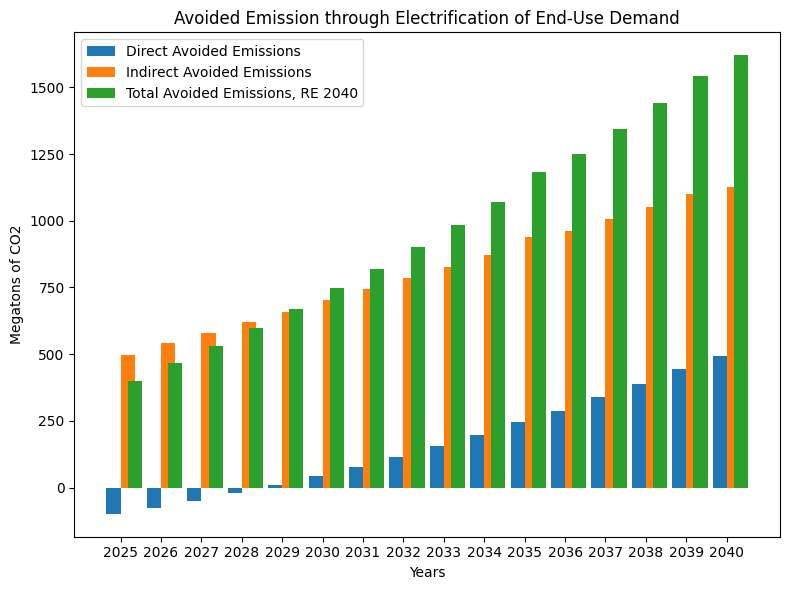

In [69]:


# Figure B -- Avoided Emissions

categories = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
y_elec_CO2 = [-98.078974,-75.087568,-49.074507,-20.752577,9.87822172,43.6899912,78.0664247,115.623829,155.490102,197.665244,245.982508,288.942133,338.043881,389.454497,443.173982,493.7841943]
y_nonelec_CO2 = [497.937466,540.649844,579.783355,619.560937,659.982588,703.639771,742.7581,785.111961,828.109892,871.751892,938.015332,960.968102,1006.54231,1052.76059,1099.62294,1126.56687]
y_total = [399.858492,465.562276,530.708849,598.80836,669.86081,747.329762,820.824525,900.73579,983.599994,1069.41714,1183.99784,1249.91024,1344.58619,1442.21509,1542.79692,1620.35107]

# Bar width
bar_width = 0.35

# Set positions for the bars
index = np.arange(len(categories))

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index - bar_width / 2, y_elec_CO2, bar_width, label='Direct Avoided Emissions')
bar2 = ax.bar(index + bar_width / 2 , y_nonelec_CO2, bar_width, label='Indirect Avoided Emissions')
bar3 = ax.bar(index + bar_width, y_total, bar_width, label='Total Avoided Emissions, RE 2040')


# Labeling the plot
ax.set_xlabel('Years')
ax.set_ylabel('Megatons of CO2')
ax.set_title('Avoided Emission through Electrification of End-Use Demand')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()




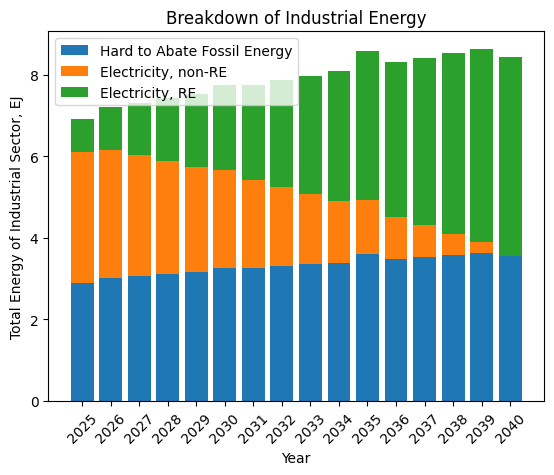

In [70]:

# FIGURE C -- SHARE OF RE IN INDUSTRIAL ELECTRICITY


categories = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
non_elec = np.array([2.90015628,3.028527448,3.074480933,3.12043442,3.166387902,3.25280494,3.25829487,3.30424836,3.35020184,3.39615533,3.60843475,3.4880623,3.53401578,3.57996927,3.62592275,3.54750443])
elec_non_RE = np.array([3.212127872,3.130557513,2.950913576,2.76447946,2.571255179,2.40110953,2.16443608,1.95084127,1.73045629,1.50328113,1.33065033,1.02856029,0.78101461,0.52667875,0.26555272,0])
total_RE = np.array([0.792849848,1.051694676,1.294798188,1.54469187,1.801375734,2.0908592,2.33511398,2.61216836,2.89601292,3.18664765,3.65242622,3.78828764,4.0992929,4.41708833,4.74167393,4.90121811])

# Create the bar chart
plt.bar(categories, non_elec, label='Hard to Abate Fossil Energy')
plt.bar(categories, elec_non_RE, bottom=non_elec, label='Electricity, non-RE')
plt.bar(categories, total_RE, bottom=non_elec + elec_non_RE, label='Electricity, RE')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Energy of Industrial Sector, EJ')
plt.title('Breakdown of Industrial Energy')

# Add legend
plt.legend()

# Make x axis longer
plt.xticks(rotation=45)

# Show the chart
plt.show()




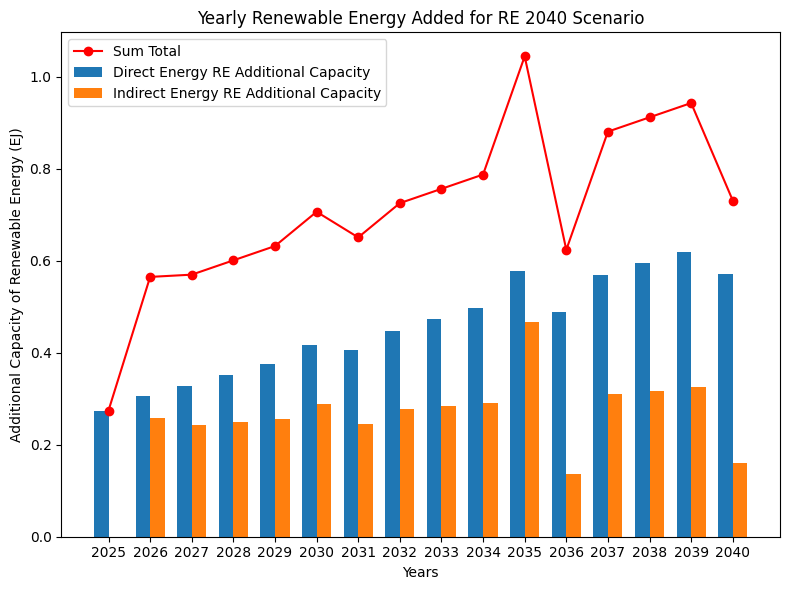

In [71]:
# FIGURE D Renewable energy installed each year (additional capacity of industrial and operational electricity)



categories = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
elec_add_cap = [0.27438775,0.30604014,0.32667429,0.35098118,0.37528808,0.41696684,0.40652999,0.44820876,0.47251565,0.49682255,0.57863314,0.48793265,0.56974323,0.59405013,0.61835702,0.5714611]
non_elec_add_cap = [0,0.25884483,0.24310351,0.24989369,0.25668386,0.28948346,0.24425478,0.27705438,0.28384456,0.29063473,0.46577857,0.13586142,0.31100526,0.31779543,0.32458561,0.15954418]

# Bar width
bar_width = 0.35

# Set positions for the bars
index = np.arange(len(categories))

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index - bar_width / 2, elec_add_cap, bar_width, label='Direct Energy RE Additional Capacity')
bar2 = ax.bar(index + bar_width / 2, non_elec_add_cap, bar_width, label='Indirect Energy RE Additional Capacity')

# Calculate the sum of the bars for each category
sum_total = np.array(elec_add_cap) + np.array(non_elec_add_cap)

# Plot the sum line
ax.plot(index, sum_total, color='red', marker='o', linestyle='-', label='Sum Total')

# Labeling the plot
ax.set_xlabel('Years')
ax.set_ylabel('Additional Capacity of Renewable Energy (EJ)')
ax.set_title('Yearly Renewable Energy Added for RE 2040 Scenario')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



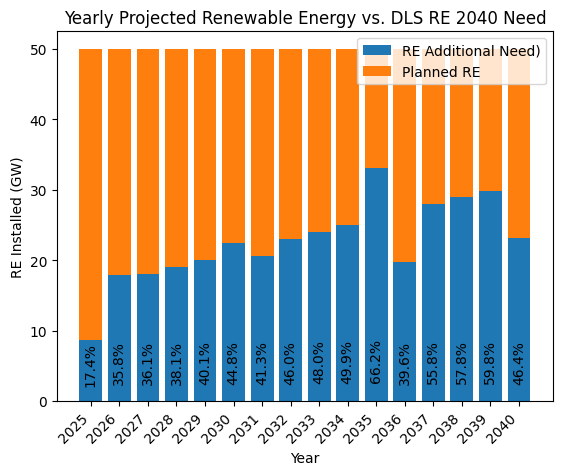

<Figure size 1200x600 with 0 Axes>

In [72]:
# Figure F -- comparison of Re planned capacity w/ DLS need


categories = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
DLS_RE= np.array([8.699675115,17.91011303,18.06524408,19.05120061,20.03715715,22.39855129,20.63363262,22.99502676,23.9809833,24.96693983,33.11387774,19.77787154,27.92480944,28.91076598,29.89672252,23.17708556])
Diff_Planned = np.array([41.30032489,32.08988697,31.93475592,30.94879939,29.96284285,27.60144871,29.36636738,27.00497324,26.0190167,25.03306017,16.88612226,30.22212846,22.07519056,21.08923402,20.10327748,26.82291444])
percent = [17.4,35.8,36.1,38.1,40.1,44.8,41.3,46.0,48.0,49.9,66.2,39.6,55.8,57.8,59.8,46.4]

# Create the bar chart
plt.bar(categories, DLS_RE, label='RE Additional Need)')
plt.bar(categories, Diff_Planned, bottom=DLS_RE, label='Planned RE')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('RE Installed (GW)')
plt.title('Yearly Projected Renewable Energy vs. DLS RE 2040 Need')

# Add legend
plt.legend()

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels and adjust alignment

# Add labels to each bar
# Adjust the y-coordinate for the labels to prevent them from causing issues
for i in range(len(categories)):
    total_height = DLS_RE[i]/50  # Calculate the total height of the stacked bars
    plt.text(i, total_height + 2, str(percent[i]) + "%", ha='center', va='bottom',
    rotation=90  ) # Adjust y-coordinate and add "%"



  # Increase the width of the figure
plt.figure(figsize=(12, 6))  # Wider figure

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.2)  # Adjust these as needed

# Show the chart
plt.show()



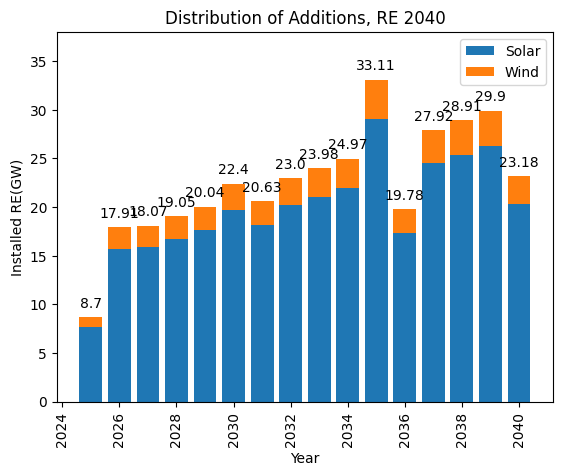

<Figure size 2400x1600 with 0 Axes>

In [73]:
# Figure F -- Distribution of re resources



categories = [2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040]
solar = [7.639499653,15.72751861,15.8637448,16.72954893,17.59535305,19.66897873,18.11913975,20.19276543,21.05856956,21.92437369,29.07849479,17.36766497,24.52178607,25.3875902,26.25339433,20.35263786]
wind = [1.060175462,2.182594419,2.201499278,2.321651688,2.441804097,2.729572559,2.514492864,2.802261326,2.922413735,3.042566145,4.035382951,2.410206567,3.403023373,3.523175783,3.643328192,2.824447703]

# Create the bar chart
plt.bar(categories, solar, label='Solar')
plt.bar(categories, wind, bottom=solar, label='Wind')



# Add labels and title
plt.xlabel('Year')
plt.ylabel('Installed RE(GW)')
plt.title('Distribution of Additions, RE 2040')

# Add legend
plt.legend()

plt.xticks(rotation=90)

# Adjust the y-axis limits
plt.ylim(0, 38
        )

# Add labels to each bar

for i in range(len(categories)):
    total_height = solar[i] + wind[i]
    plt.text(categories[i], total_height + 1, str(round(total_height, 2)), ha='center')

plt.figure(figsize=(24, 16))  # width, height in inches
# Show the chart
plt.show()

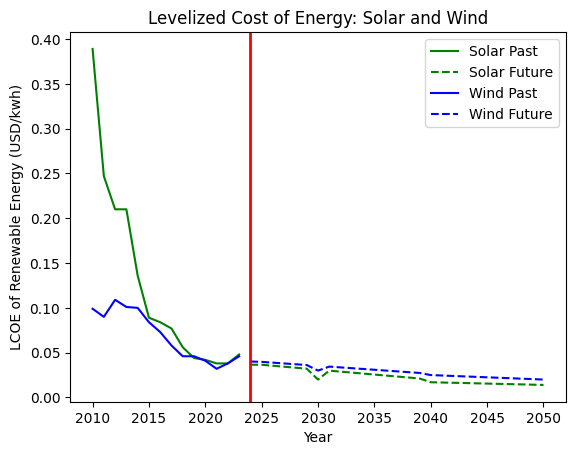

In [74]:
# Figure G


# Solar past; solid line

x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y = [0.389,0.247,0.21,0.21,0.136,0.089,0.084,0.077,0.056,0.044,0.042,0.038,0.038,0.048]

plt.plot(x, y, color='g', linestyle='-')

# Solar future

x1 = [2024, 2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040, 2050]
y1 = [0.036595006, 0.036493101,0.03540072,0.034308338,0.033215957,0.032123575,0.02,0.029938812,0.028846431,0.027754049,0.026661668,0.025569286,0.024476905,0.023384523,0.022292142,0.02119976,0.017, 0.014]

plt.plot(x1, y1, color='g', linestyle='--')

# Add another line based on a different set of data on the same graph

# Wind past; solid line

x3 = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y3 = [0.099,0.09,0.109,0.101,0.1,0.084,0.073,0.058,0.046,0.046,0.041,0.032,0.038,0.046]

plt.plot(x3, y3, color='b', linestyle='-')

# Wind future

x4 = [2024, 2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040, 2050]
y4 = [0.040140447,0.039736053,0.038853629,0.037971206,0.037088782,0.036206359,0.03,0.034441512,0.033559088,0.032676665,0.031794241,0.030911818,0.030029394,0.029146971,0.028264547,0.027382124,0.025,0.020]

plt.plot(x4, y4, color='b', linestyle='--')

# Add vertical line at x = 3 to demonstrate where the years switch from past to future
plt.axvline(x=2024, color='red', linestyle='-', linewidth=2, label=['Projected'])


# Add labels and title
plt.xlabel('Year')
plt.ylabel('LCOE of Renewable Energy (USD/kwh)')
plt.title('Levelized Cost of Energy: Solar and Wind')

# Add a legend
plt.legend(['Solar Past', 'Solar Future', 'Wind Past', 'Wind Future'])

plt.show()



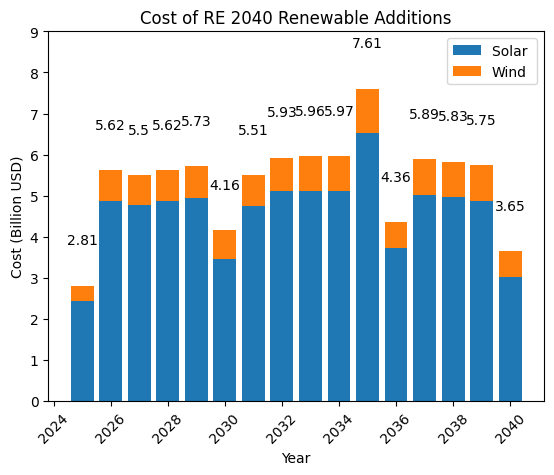

In [75]:
# Figure H - Yearly cost of DLS renewbale add for RE 2040


categories = [2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040]
cost_of_solar = [2.442501715,4.877884236,4.768311152,4.868444088,4.952004709,3.446442163,4.752600721,5.103252681,5.120524042,5.121223088,6.51402939,3.724406848,5.023886334,4.958296119,4.876133589,3.031299269]
cost_of_wind = [0.369080976,0.742957242,0.732372661,0.754395044,0.774559627,0.717422654,0.758737939,0.823906584,0.836639972,0.84751556,1.092869953,0.634103315,0.868995531,0.872439924,0.874026517,0.618632504]

# Create the bar chart
plt.bar(categories, cost_of_solar, label='Solar ')
plt.bar(categories, cost_of_wind, bottom=cost_of_solar, label='Wind')

# Set the chart title and axis labels

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cost (Billion USD)')
plt.title('Cost of RE 2040 Renewable Additions')

# Add legend
plt.legend()

# Add labels that add up the total column height to the top
for i in range(len(categories)):
    total_height = cost_of_solar[i] + cost_of_wind[i]

    # Add labels to each bar
for i in range(len(categories)):
    total_height = cost_of_solar[i] + cost_of_wind[i]
    plt.text(categories[i], total_height + 1, str(round(total_height, 2)), ha='center')

# Adjust the y-axis limits
plt.ylim(0, 9)


plt.xticks(rotation=45)

# Show the chart
plt.show()

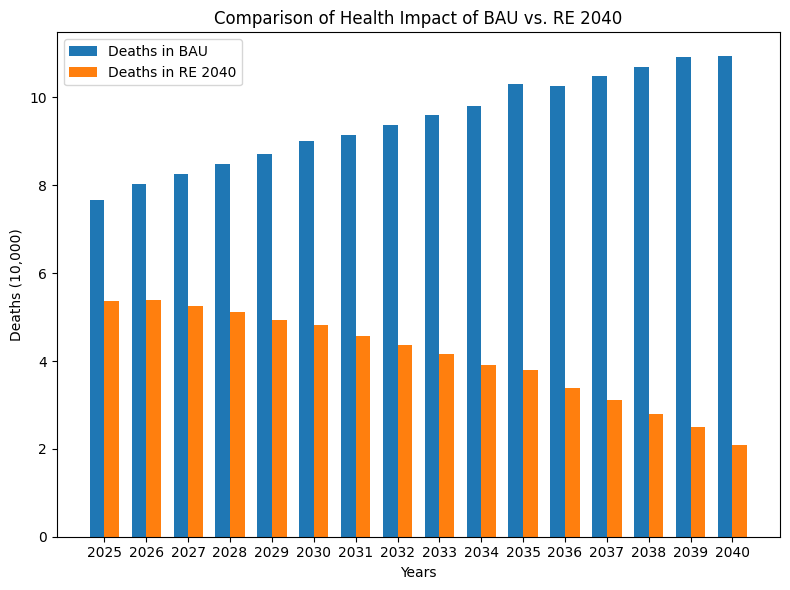

In [76]:
# Figure I -- Deaths per year; HEALTH CARE GRAPH


categories = ['2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039','2040']
BAU_yr_deaths = [7.676892291,8.039916839,8.261816031,8.483715224,8.705614417,8.99902257,9.149412802,9.371311994,9.593211187,9.81511038,10.31736772,10.25890876,10.48080796,10.70270715,10.92460634,10.93576379]
RE_2040_deaths = [5.37020042,5.378423004,5.249428631,5.104878579,4.944772848,4.822318068,4.577894349,4.371121581,4.148793133,3.910909007,3.798982385,3.388473717,3.103922553,2.80381571,2.488153188,2.085018689]

# Bar width
bar_width = 0.35

# Set positions for the bars
index = np.arange(len(categories))

# Plotting side-by-side bars
fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index - bar_width / 2, BAU_yr_deaths, bar_width, label='Deaths in BAU')
bar2 = ax.bar(index + bar_width / 2 , RE_2040_deaths, bar_width, label='Deaths in RE 2040')



# Labeling the plot
ax.set_xlabel('Years')
ax.set_ylabel('Deaths (10,000)')
ax.set_title('Comparison of Health Impact of BAU vs. RE 2040')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



There you have it! All of the code for my thesis, cleaned and ready to be used by anyone else who might like to. Thanks for reading!